This notebook implements exploratory data analysis, feature engineering and deep learning to create a model that predicts a person's loan status based on various attributes.

# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_info = pd.read_csv('../Data/lending_club_info.csv')

In [3]:
df_info.head()

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade


In [4]:
def feat_info(feat_name):
    return df_info[df_info['LoanStatNew'] == feat_name]['Description']

In [5]:
df = pd.read_csv('../Data/lending_club_loan_two.csv')

In [6]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [8]:
feat_info('grade')

4    LC assigned loan grade
Name: Description, dtype: object

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


# Data preprocessing and Feature Engineering

DEALING WITH MISSING VALUES

In [10]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

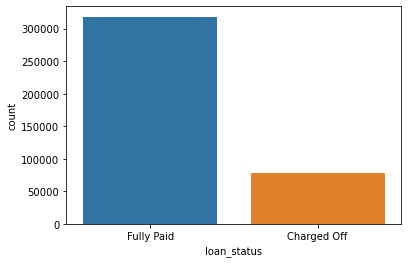

In [11]:
sns.countplot(x = 'loan_status', data = df)

#note that the data is not balanced

In [12]:
#checking out the no. of titles

df['emp_title'].value_counts()

Teacher                                     4389
Manager                                     4250
Registered Nurse                            1856
RN                                          1846
Supervisor                                  1830
                                            ... 
County Attorney/Law Director                   1
Retail coordinator/ spa concierge              1
VHB Engineering                                1
Head Sound                                     1
Veterinary Specialty and Emergency Cente       1
Name: emp_title, Length: 173105, dtype: int64

In [13]:
#converting length of employment to numerical data

def get_num(length):
    if type(length) == str:
        words = length.split()
        for word in words:
            if word.isdigit():
                return int(word)
    else:
        return length

In [14]:
df['emp_length'] = df['emp_length'].apply(get_num)

In [15]:
inc_by_emplen = df.groupby('emp_length')['annual_inc'].mean()

In [16]:
inc_by_emplen.iloc[0]

69421.87970229312

In [17]:
df['emp_length'].fillna(-1, inplace = True)

In [18]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,-1.0,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4.0,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,1.0,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6.0,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9.0,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [19]:
#this function fills missing employment length data depending on what the income value is 

def get_len(df_data):
    length = df_data[0]
    income = df_data[1]
    if length == -1:
        if income < inc_by_emplen.iloc[0]:
            return 1
        elif income < inc_by_emplen.iloc[1]:
            return 2
        elif income < inc_by_emplen.iloc[2]:
            return 3
        elif income < inc_by_emplen.iloc[3]:
            return 4
        elif income < inc_by_emplen.iloc[4]:
            return 5
        elif income < inc_by_emplen.iloc[5]:
            return 6
        elif income < inc_by_emplen.iloc[6]:
            return 7
        elif income < inc_by_emplen.iloc[7]:
            return 8
        elif income < inc_by_emplen.iloc[8]:
            return 9
        else:
            return 10
    else:
        return length

In [20]:
df['length_emp'] = df[['emp_length','annual_inc']].apply(get_len, axis = 1)

In [21]:
df.groupby('address').count()['loan_status']

#too many addresses

address
000 Adam Station Apt. 329\nAshleyberg, AZ 22690    1
000 Adrian Cliffs\nRandyton, LA 22690              1
000 Alexandria Street\nPort Richard, FL 22690      1
000 Amber Court\nLake Pamelatown, IN 00813         1
000 Amy Pines Suite 498\nSouth Susan, ND 22690     1
                                                  ..
Unit 9995 Box 6277\nDPO AE 48052                   1
Unit 9995 Box 8360\nDPO AP 00813                   1
Unit 9996 Box 9255\nDPO AP 05113                   1
Unit 9997 Box 3228\nDPO AA 11650                   1
Unit 9997 Box 3834\nDPO AP 86630                   1
Name: loan_status, Length: 393700, dtype: int64

In [22]:
#Since there are too many titles,emp_titles they will be dropped. emp_length was used and will be dropped
df.drop(['emp_title','emp_length','title'], inplace = True, axis = 1)

In [23]:
#converting term into numerical data

def get_term(term):
    for i in term.split():
        if i.isdigit():
            return int(i)
    return term

In [24]:
df['term'] = df['term']. apply(get_term)

In [25]:
df.groupby('term').count()

,loan_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,length_emp
term,,,,,,,,,,,,,,,,,,,,,
36,302005,302005,302005,302005,302005,302005,302005,302005,302005,302005,...,302005,302005,301782,302005,302005,302005,273776,301470,302005,302005
60,94025,94025,94025,94025,94025,94025,94025,94025,94025,94025,...,94025,94025,93972,94025,94025,94025,84459,94025,94025,94025


In [26]:
df.groupby('purpose').count()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,length_emp
purpose,,,,,,,,,,,,,,,,,,,,,
car,4697,4697,4697,4697,4697,4697,4697,4697,4697,4697,...,4697,4697,4687,4697,4697,4697,3288,4680,4697,4697
credit_card,83019,83019,83019,83019,83019,83019,83019,83019,83019,83019,...,83019,83019,82999,83019,83019,83019,77699,82943,83019,83019
debt_consolidation,234507,234507,234507,234507,234507,234507,234507,234507,234507,234507,...,234507,234507,234384,234507,234507,234507,216474,234292,234507,234507
educational,257,257,257,257,257,257,257,257,257,257,...,257,257,255,257,257,257,1,248,257,257
home_improvement,24030,24030,24030,24030,24030,24030,24030,24030,24030,24030,...,24030,24030,23997,24030,24030,24030,21353,23994,24030,24030
house,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,...,2201,2201,2201,2201,2201,2201,1819,2197,2201,2201
major_purchase,8790,8790,8790,8790,8790,8790,8790,8790,8790,8790,...,8790,8790,8769,8790,8790,8790,6853,8777,8790,8790
medical,4196,4196,4196,4196,4196,4196,4196,4196,4196,4196,...,4196,4196,4183,4196,4196,4196,3570,4188,4196,4196
moving,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854,...,2854,2854,2850,2854,2854,2854,2344,2846,2854,2854


In [27]:
df['zip'] = df['address'].apply(lambda x : (x[-5:]))

In [28]:
df['state'] = df['address'].apply(lambda x : (x[-8:-6]))

In [29]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'length_emp', 'zip', 'state'],
      dtype='object')

In [30]:
feat_info('mort_acc')

26    Number of mortgage accounts.
Name: Description, dtype: object

In [31]:
feat_info('dti')

17    A ratio calculated using the borrower’s total ...
Name: Description, dtype: object

In [32]:
df.groupby('earliest_cr_line').count()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,length_emp,zip,state
earliest_cr_line,,,,,,,,,,,,,,,,,,,,,
Apr-1955,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Apr-1958,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Apr-1960,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Apr-1961,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Apr-1962,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sep-2009,391,391,391,391,391,391,391,391,391,391,...,391,391,391,391,391,391,391,391,391,391
Sep-2010,346,346,346,346,346,346,346,346,346,346,...,346,346,346,346,346,346,346,346,346,346
Sep-2011,209,209,209,209,209,209,209,209,209,209,...,209,209,209,209,209,209,209,209,209,209


In [33]:
type(df['earliest_cr_line'][0])

str

In [34]:

def get_crline(crline):
    for i in crline.split('-'):
        if i.isdigit():
            return i
    else:
        return crline



In [35]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(get_crline)
df.drop('earliest_cr_line', axis = 1, inplace = True)

In [36]:
df.groupby('earliest_cr_year').count()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,length_emp,zip,state
earliest_cr_year,,,,,,,,,,,,,,,,,,,,,
1944,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1948,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1950,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,2,3,3,3,3,3
1951,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1953,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,3874,3874,3874,3874,3874,3874,3874,3874,3874,3874,...,3874,3874,3874,3874,3871,3874,3874,3874,3874,3874
2010,3156,3156,3156,3156,3156,3156,3156,3156,3156,3156,...,3156,3156,3156,3156,3156,3156,3156,3156,3156,3156
2011,2133,2133,2133,2133,2133,2133,2133,2133,2133,2133,...,2133,2133,2133,2133,2133,2133,2133,2133,2133,2133


In [37]:
df['revol_util'].mean()

53.79174863677853

In [38]:
df['revol_util'].fillna(df['revol_util'].mean(), inplace = True)

In [39]:
#let's see what has the highest correlation with number of mortrage account
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007510
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
term                    0.096220
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
length_emp              0.203449
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [40]:
df[['mort_acc','total_acc']].head()

,mort_acc,total_acc
0,0.0,25.0
1,3.0,27.0
2,0.0,26.0
3,0.0,13.0
4,1.0,43.0


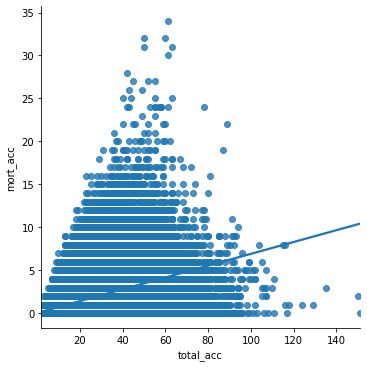

In [41]:
sns.lmplot(x = 'total_acc', y = 'mort_acc', data = df)

In [42]:
df['mort_acc'].isnull().sum()

37795

In [43]:
df['mort_acc'].fillna(-1, inplace = True)

In [44]:

'''
The slope of the regression line is roughly 10/140 = 0.07. 
We can derive the relation that mort_acc = 0.07*total_acc
'''

def get_mort(df_data2):
    mort = df_data2[0]
    total = df_data2[1]
    if mort == -1:
        return np.ceil(total*0.07)
    else:
        return mort

In [45]:
df['mort_acc'] = df[['mort_acc','total_acc']].apply(get_mort, axis = 1)

In [46]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
length_emp                0
zip                       0
state                     0
earliest_cr_year          0
dtype: int64

In [47]:
df.corr()['pub_rec_bankruptcies'].sort_values()

revol_bal              -0.124532
loan_amnt              -0.106539
installment            -0.098628
revol_util             -0.086745
annual_inc             -0.050162
length_emp             -0.036893
open_acc               -0.027732
term                   -0.019826
dti                    -0.014558
mort_acc                0.023969
total_acc               0.042035
int_rate                0.057450
pub_rec                 0.699408
pub_rec_bankruptcies    1.000000
Name: pub_rec_bankruptcies, dtype: float64

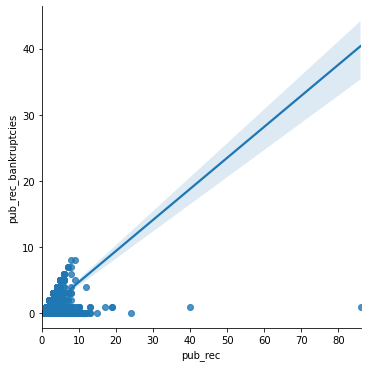

In [48]:
sns.lmplot(x = 'pub_rec', y = 'pub_rec_bankruptcies', data = df)

In [49]:
'''
The regression plot above shows that the slope is about 10/22 = 0.45. Therefore, we can interpolate pub_rec_bankruptcies = 
0.45* pub_rec for NaN values.
'''

df['pub_rec_bankruptcies'].fillna(-1, inplace = True)

def get_prb(df_data3):
    prb = df_data3[0]
    pr = df_data3[1]
    if prb == -1:
        return np.ceil(pr*0.45)
    else:
        return prb

In [50]:
df['pub_rec_bankruptcies'] = df[['pub_rec_bankruptcies', 'pub_rec']].apply(get_prb, axis = 1)

In [51]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
length_emp              0
zip                     0
state                   0
earliest_cr_year        0
dtype: int64

MORE EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='loan_status', ylabel='count'>

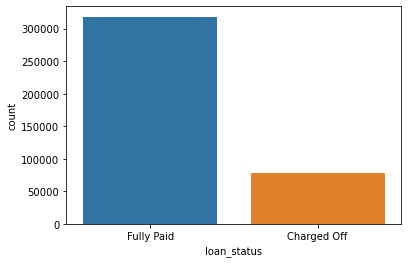

In [52]:
sns.countplot(x = 'loan_status', data = df)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

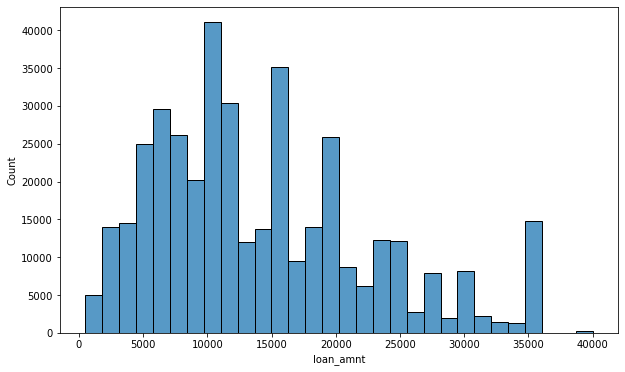

In [53]:
plt.figure(figsize = (10,6))
sns.histplot(data = df, x = 'loan_amnt', kde = False, bins = 30)

<AxesSubplot:>

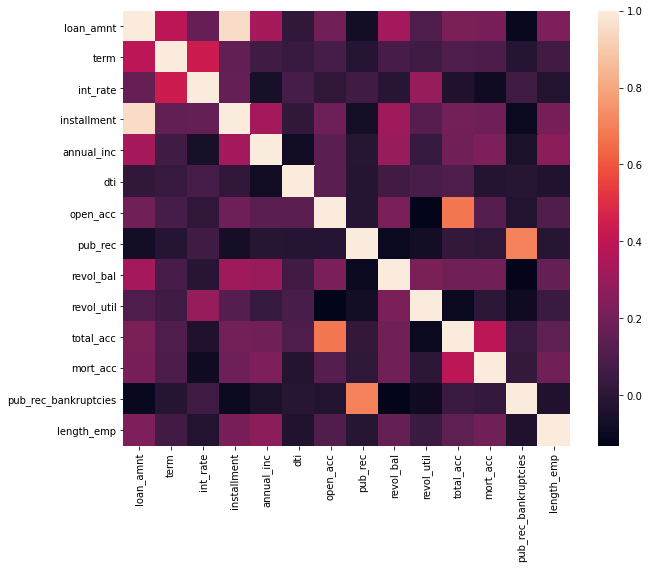

In [54]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr())

Text(0, 0.5, 'loan amount')

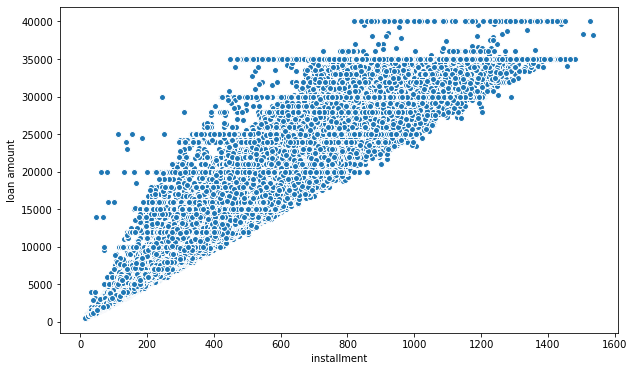

In [55]:
plt.figure(figsize = (10,6))
plt.scatter(x = 'installment', y = 'loan_amnt', data = df, edgecolors = 'white')
plt.xlabel('installment')
plt.ylabel('loan amount')

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

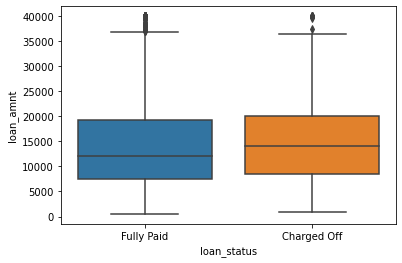

In [56]:
sns.boxplot(x ='loan_status', y = 'loan_amnt', data = df)

<AxesSubplot:xlabel='grade', ylabel='count'>

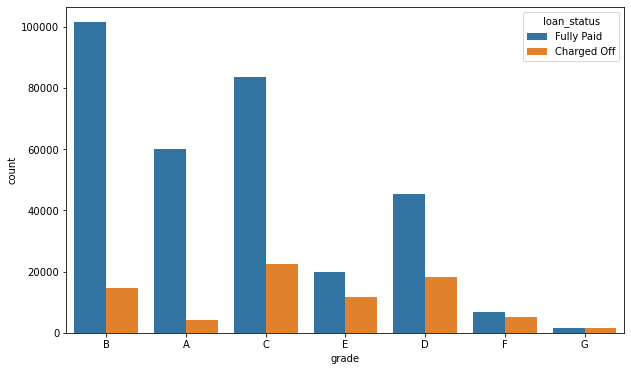

In [57]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'grade', data = df, hue = 'loan_status')

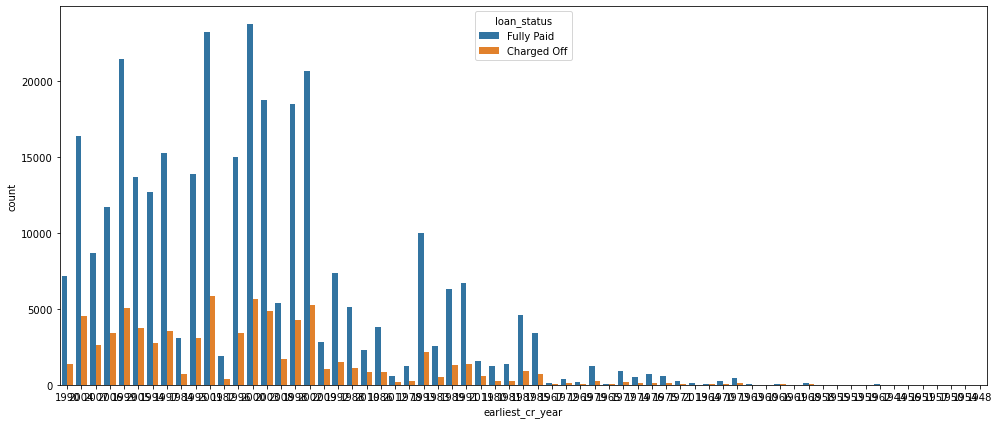

In [58]:
plt.figure(figsize = (14,6))
sns.countplot(x = 'earliest_cr_year', data = df, hue = 'loan_status')
plt.tight_layout()

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

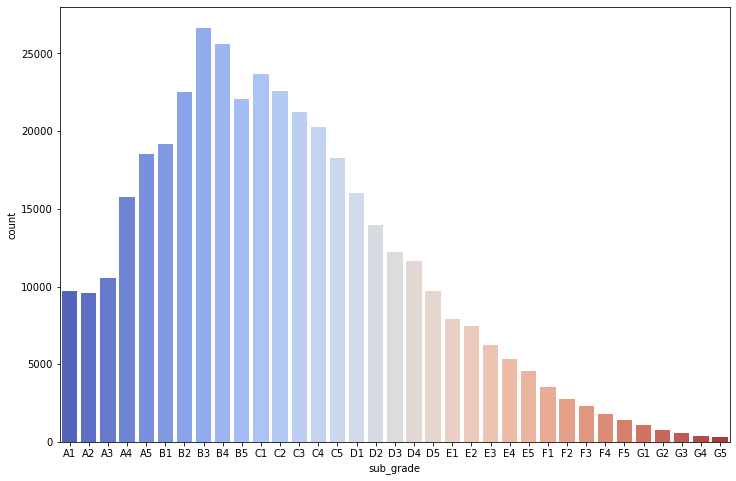

In [59]:
plt.figure(figsize = (12,8 ))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = df, order = subgrade_order, palette = 'coolwarm')

In [60]:
df.groupby('verification_status').count()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,issue_d,loan_status,...,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,length_emp,zip,state,earliest_cr_year
verification_status,,,,,,,,,,,,,,,,,,,,,
Not Verified,125082,125082,125082,125082,125082,125082,125082,125082,125082,125082,...,125082,125082,125082,125082,125082,125082,125082,125082,125082,125082
Source Verified,131385,131385,131385,131385,131385,131385,131385,131385,131385,131385,...,131385,131385,131385,131385,131385,131385,131385,131385,131385,131385
Verified,139563,139563,139563,139563,139563,139563,139563,139563,139563,139563,...,139563,139563,139563,139563,139563,139563,139563,139563,139563,139563


In [61]:
#we are dropping issue_d because we wouldn't know if a loan had been issued beforehand
df.drop(['sub_grade', 'issue_d'], axis = 1, inplace = True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   loan_status           396030 non-null  object 
 9   purpose               396030 non-null  object 
 10  dti                   396030 non-null  float64
 11  open_acc              396030 non-null  float64
 12  pub_rec               396030 non-null  float64
 13  revol_bal             396030 non-null  float64
 14  revol_util            396030 non-null  float64
 15  

<AxesSubplot:xlabel='earliest_cr_year'>

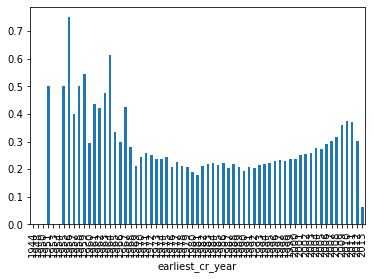

In [63]:
#let's see if difference in cr line year has a significant effect on loan status
crl_co = df[df['loan_status'] == 'Charged Off'].groupby('earliest_cr_year').count()['loan_status']
crl_fp = df[df['loan_status'] == 'Fully Paid'].groupby('earliest_cr_year').count()['loan_status']
crl_rt = crl_co/crl_fp

crl_rt.plot(kind = 'bar')

In [64]:
#since the difference is only significant for few values and the number of values is too large, we will drop this
df.drop('earliest_cr_year', axis = 1, inplace = True)

In [65]:
'''
Now that we don't have any null values,
the following features will be converted into dummy variables: earliest cr_year, grade, home_ownership, verification status, purpose,
application_type, etc.
Before that let's explore how each of these affect loan_status
'''

"\nNow that we don't have any null values,\nthe following features will be converted into dummy variables: earliest cr_year, grade, home_ownership, verification status, purpose,\napplication_type, etc.\nBefore that let's explore how each of these affect loan_status\n"

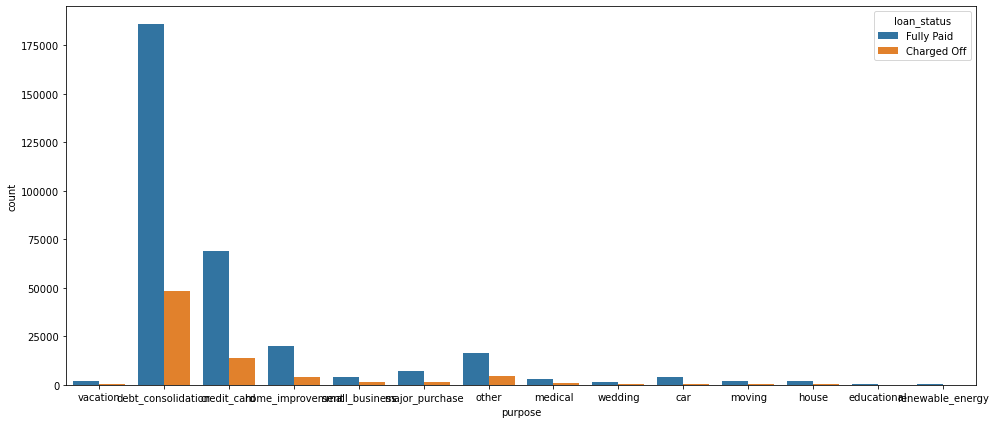

In [66]:
plt.figure(figsize = (14,6))
sns.countplot(x = 'purpose', data = df, hue = 'loan_status')
plt.tight_layout()

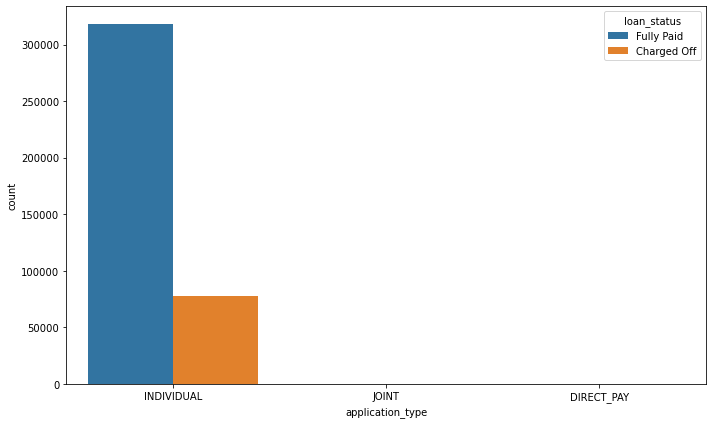

In [67]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'application_type', data = df, hue = 'loan_status')
plt.tight_layout()

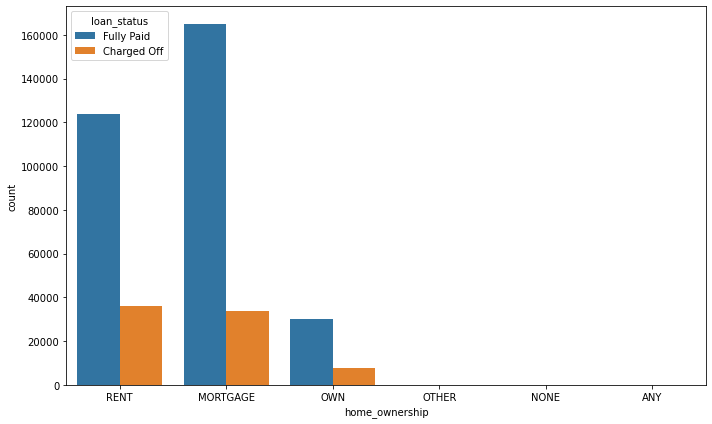

In [68]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'home_ownership', data = df, hue = 'loan_status')
plt.tight_layout()

<AxesSubplot:xlabel='length_emp', ylabel='count'>

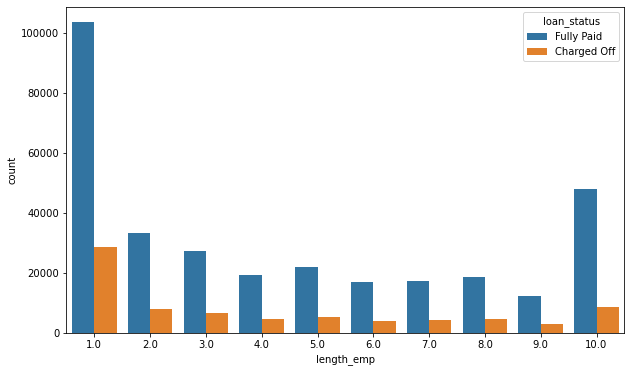

In [69]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'length_emp', data = df, hue = 'loan_status')

<AxesSubplot:xlabel='verification_status', ylabel='count'>

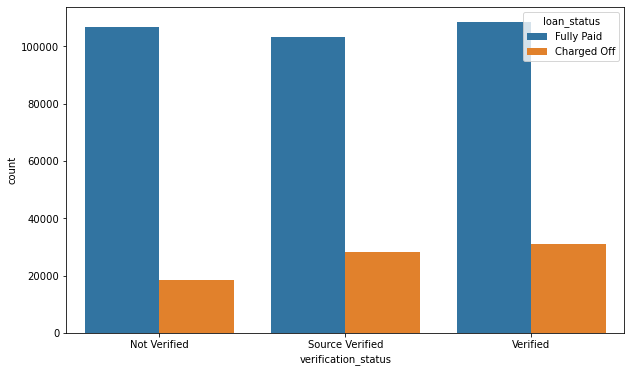

In [70]:
plt.figure(figsize = (10,6))
sns.countplot(data = df , x = 'verification_status', hue = 'loan_status')

<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

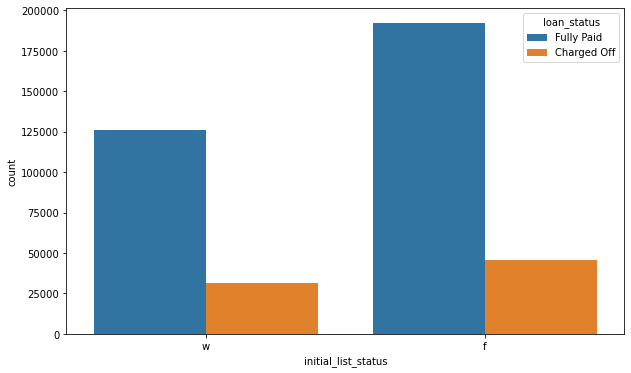

In [71]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'initial_list_status', data = df, hue ='loan_status')

In [72]:
'''
Note that in all of the cases above, for every category, the count for fully paid seems to be greater than the count for 
charged off which does not provide evidence for string relationship between these categories and being able to pay off the
loan. In this scenario, we can find the actual ratio of charged off to fully paid per category.
'''

'\nNote that in all of the cases above, for every category, the count for fully paid seems to be greater than the count for \ncharged off which does not provide evidence for string relationship between these categories and being able to pay off the\nloan. In this scenario, we can find the actual ratio of charged off to fully paid per category.\n'

<AxesSubplot:xlabel='purpose'>

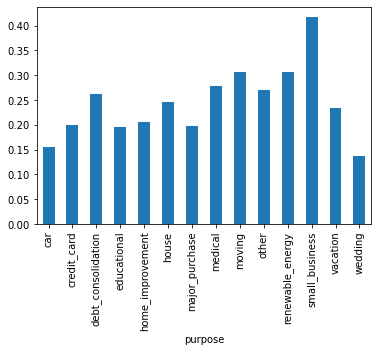

In [73]:
#for purpose
pur_co = df[df['loan_status'] == 'Charged Off'].groupby('purpose').count()['loan_status']
pur_fp = df[df['loan_status'] == 'Fully Paid'].groupby('purpose').count()['loan_status']
pur_rt = pur_co/pur_fp

pur_rt.plot(kind = 'bar')

<AxesSubplot:xlabel='application_type'>

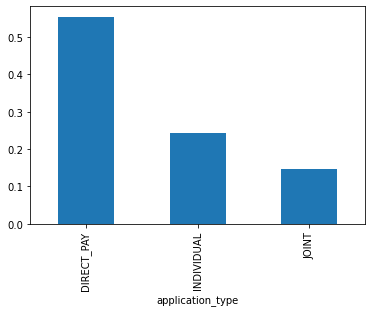

In [74]:
#for application_type
app_co = df[df['loan_status'] == 'Charged Off'].groupby('application_type').count()['loan_status']
app_fp = df[df['loan_status'] == 'Fully Paid'].groupby('application_type').count()['loan_status']
app_rt = app_co/app_fp

app_rt.plot(kind = 'bar')

<AxesSubplot:xlabel='home_ownership'>

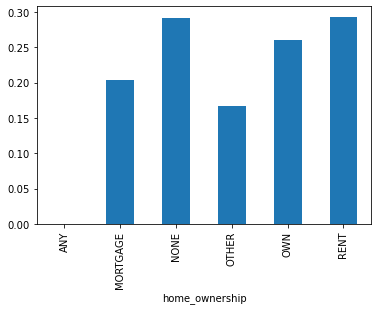

In [75]:
#for home_ownership
home_co = df[df['loan_status'] == 'Charged Off'].groupby('home_ownership').count()['loan_status']
home_fp = df[df['loan_status'] == 'Fully Paid'].groupby('home_ownership').count()['loan_status']
home_rt = home_co/home_fp

home_rt.plot(kind = 'bar')

In [76]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

<AxesSubplot:xlabel='length_emp'>

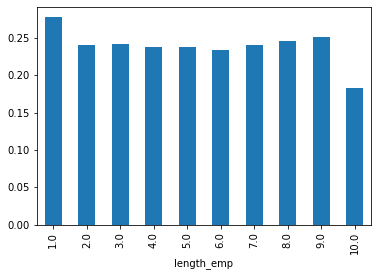

In [77]:
#for length_emp
emp_co = df[df['loan_status'] == 'Charged Off'].groupby('length_emp').count()['loan_status']
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('length_emp').count()['loan_status']
emp_rt = emp_co/emp_fp

emp_rt.plot(kind = 'bar')

In [78]:
#The length of employment does not seem to have a strong effect either so we can drop it too
df.drop('length_emp', axis = 1, inplace = True)

<AxesSubplot:xlabel='grade'>

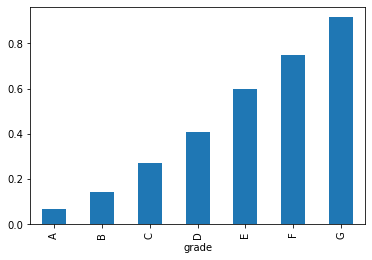

In [79]:
#for grade
gr_co = df[df['loan_status'] == 'Charged Off'].groupby('grade').count()['loan_status']
gr_fp = df[df['loan_status'] == 'Fully Paid'].groupby('grade').count()['loan_status']
gr_rt = gr_co/gr_fp

gr_rt.plot(kind = 'bar')

<AxesSubplot:xlabel='verification_status'>

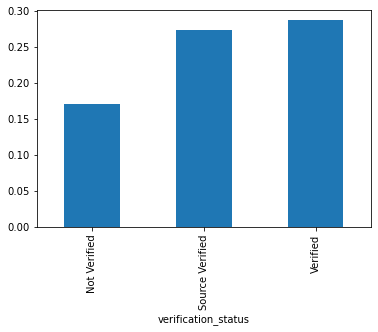

In [80]:
#for verification_status
ver_co = df[df['loan_status'] == 'Charged Off'].groupby('verification_status').count()['loan_status']
ver_fp = df[df['loan_status'] == 'Fully Paid'].groupby('verification_status').count()['loan_status']
ver_rt = ver_co/ver_fp

ver_rt.plot(kind = 'bar')

<AxesSubplot:xlabel='initial_list_status'>

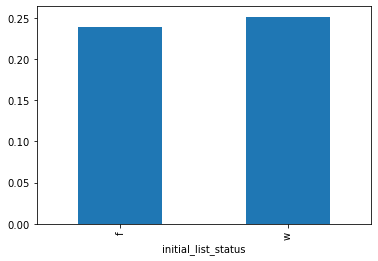

In [81]:
#for initial_list_status
ils_co = df[df['loan_status'] == 'Charged Off'].groupby('initial_list_status').count()['loan_status']
ils_fp = df[df['loan_status'] == 'Fully Paid'].groupby('initial_list_status').count()['loan_status']
ils_rt = ils_co/ils_fp

ils_rt.plot(kind = 'bar')

In [82]:
#The initial list status does not seem to have a strong effect either so we can drop it too
df.drop('initial_list_status', axis = 1, inplace = True)

<AxesSubplot:xlabel='state', ylabel='count'>

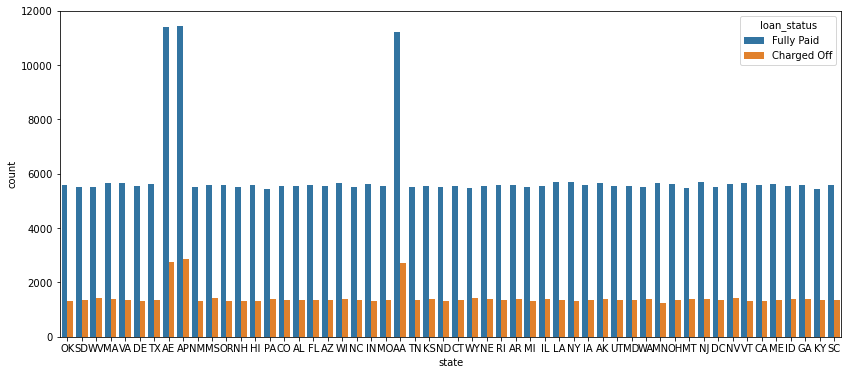

In [83]:
plt.figure(figsize = (14,6))
sns.countplot(x = 'state', data = df, hue = 'loan_status')


<AxesSubplot:xlabel='state'>

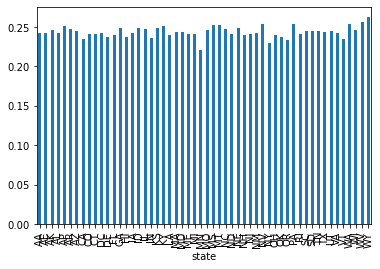

In [84]:
#for state
st_co = df[df['loan_status'] == 'Charged Off'].groupby('state').count()['loan_status']
st_fp = df[df['loan_status'] == 'Fully Paid'].groupby('state').count()['loan_status']
st_rt = st_co/st_fp

st_rt.plot(kind = 'bar')

In [85]:
#The states does not seem to have a strong effect either so we can drop it too
df.drop('state', axis = 1, inplace = True)

In [86]:
'''
With this analysis we can conclude that the following categorical variables have a strong correlation with loan_status:
1.grade
2.application_type
3.purpose
4.verifiation_status
5.home_ownership
6.zip
7.earliest_cr_year
'''

'\nWith this analysis we can conclude that the following categorical variables have a strong correlation with loan_status:\n1.grade\n2.application_type\n3.purpose\n4.verifiation_status\n5.home_ownership\n6.zip\n7.earliest_cr_year\n'

In [87]:
dummies = pd.get_dummies(df[['zip','grade','application_type','purpose','verification_status','home_ownership']], drop_first = True)

In [88]:
df.drop(['address','zip','grade','application_type','purpose','verification_status','home_ownership'], axis = 1, inplace = True)

In [89]:
df = pd.concat([df,dummies], axis = 1)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 49 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int64  
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   annual_inc                           396030 non-null  float64
 5   loan_status                          396030 non-null  object 
 6   dti                                  396030 non-null  float64
 7   open_acc                             396030 non-null  float64
 8   pub_rec                              396030 non-null  float64
 9   revol_bal                            396030 non-null  float64
 10  revol_util                           396030 non-null  float64
 11  total_acc    

In [91]:
def conv_loan_status(status):
    if status == 'Fully Paid':
        return 1
    else:
        return 0

In [92]:
df['loan_status'] = df['loan_status'].apply(conv_loan_status)

In [93]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,329.48,117000.0,1,26.24,16.0,0.0,36369.0,...,0,0,0,1,0,0,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,1,22.05,17.0,0.0,20131.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,1,12.79,13.0,0.0,11987.0,...,0,0,0,0,0,1,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,1,2.60,6.0,0.0,5472.0,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,0,33.95,13.0,0.0,24584.0,...,0,0,0,0,0,0,1,0,0,0


TRAIN TEST SPLIT AND SCALING

In [94]:
X = df.drop('loan_status', axis = 1).values
y = df['loan_status'].values

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaler = MinMaxScaler()

In [99]:
X_train = scaler.fit_transform(X_train)

In [100]:
X_test = scaler.transform(X_test)

# Model Training

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [102]:
X_train.shape

(277221, 48)

In [103]:
#creating a model

model = Sequential()

model.add(Dense(48, activation = 'relu'))       #input layer
model.add(Dropout(0.3))

model.add(Dense(24, activation = 'relu'))       #hidden layer
model.add(Dropout(0.25))

model.add(Dense(12, activation = 'relu'))       #hidden layer
model.add(Dropout(0.25))

model.add(Dense(1, activation = 'sigmoid'))     #output layer

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [104]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3)

In [105]:
model.fit(x = X_train, y = y_train, validation_data = (X_test,y_test), epochs = 28, batch_size = 128)

Epoch 1/28
2166/2166 [==============================] - 10s 4ms/step - loss: 0.3745 - val_loss: 0.2639
Epoch 2/28
2166/2166 [==============================] - 8s 4ms/step - loss: 0.2695 - val_loss: 0.2619
Epoch 3/28
2166/2166 [==============================] - 7s 3ms/step - loss: 0.2644 - val_loss: 0.2613
Epoch 4/28
2166/2166 [==============================] - 8s 4ms/step - loss: 0.2625 - val_loss: 0.2616
Epoch 5/28
2166/2166 [==============================] - 7s 3ms/step - loss: 0.2642 - val_loss: 0.2615
Epoch 6/28
2166/2166 [==============================] - 8s 4ms/step - loss: 0.2620 - val_loss: 0.2621
Epoch 7/28
2166/2166 [==============================] - 7s 3ms/step - loss: 0.2635 - val_loss: 0.2624
Epoch 8/28
2166/2166 [==============================] - 8s 4ms/step - loss: 0.2618 - val_loss: 0.2613
Epoch 9/28
2166/2166 [==============================] - 7s 3ms/step - loss: 0.2616 - val_loss: 0.2611
Epoch 10/28
2166/2166 [==============================] - 8s 4ms/step - loss: 0.26

In [106]:
from tensorflow.keras.models import load_model

In [107]:
model.save('project_NN_model1.h5')

# Model Evaluation

In [108]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

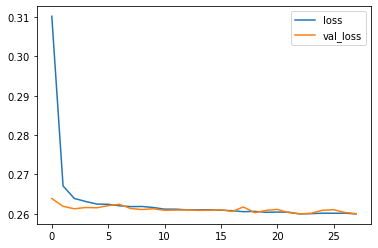

In [109]:
loss[['loss','val_loss']].plot()

In [110]:
from sklearn.metrics import classification_report, confusion_matrix

In [111]:
predictions = model.predict_classes(X_test)

C:\Users\shisk\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [112]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     23370
           1       0.88      1.00      0.93     95439

    accuracy                           0.89    118809
   macro avg       0.94      0.72      0.77    118809
weighted avg       0.90      0.89      0.87    118809



In [113]:
print(confusion_matrix(y_test,predictions))

[[10088 13282]
 [   43 95396]]


In [114]:
import random
random.seed(100)
random_index = random.randint(0,len(df))

new_customer = df.drop('loan_status', axis = 1).iloc[random_index]
new_customer.shape

(48,)

In [115]:
#we have to make sure that the data is not a series. It must be a numpy array

new_customer = new_customer.values.reshape(1,48)

In [116]:
new_customer = scaler.transform(new_customer)

In [117]:
model.predict_classes(new_customer)

C:\Users\shisk\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]])

In [118]:
#let's check if the loan was actually repaid
df.iloc[random_index]['loan_status']

1.0